# **Project 2 Workbook**

## Imports

In [66]:
# Data Handling
import pandas as pd
import numpy as np
from scipy import stats

# # Functions
# from p2p_functions import *

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling - Statsmodels
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import statsmodels.api as sms

# Modeling - SKLearn
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model

# Settings
%matplotlib inline
plt.style.use('seaborn-talk')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x))

## Defining Functions

### Data Cleaning

> The following functions enable the user to filter a Pandas series and return a boolean index to use for filtering out the outliers.
>
> In order to use the functions effectively, the results must be saved to a new variable. Then the user can perform further filtering by using the new variable to slice the dataframe to be filtered.

#### ƒ: `find_outliers_z`

In [67]:
## Check using z-score - sensitive to outliers

def find_outliers_z(data):
    """Detects outliers using the Z-score>3 cutoff.
    Returns a boolean Series where True=outlier
    
    Source: https://github.com/jirvingphd/dsc-phase-2-project/blob/main/functions_SG.py
    """
    
    zFP = np.abs(stats.zscore(data))
    zFP = pd.Series(zFP, index=data.index)
    idx_outliers = zFP > 3
    return idx_outliers

#### ƒ: `find_outliers_IQR`

In [68]:
## Check using IQR - less sensitive to outliers

def find_outliers_IQR(data):
    """
    * Takes a series sliced from a dataframe
    * Detects outliers using the 1.5*IQR thresholds.
    * Returns a boolean Series where True=outlier

    Source: https://github.com/jirvingphd/dsc-phase-2-project/blob/main/functions_SG.py
    """
    
    res = data.describe()
    q1 = res['25%']
    q3 = res['75%']
    thresh = 1.5*(q3-q1)
    idx_outliers =(data < (q1-thresh)) | (data > (q3+thresh))
    return idx_outliers

##### Testing Functions

In [69]:
# ## Testing Z-Score method

# # Run function
# idx_bdrm_out_z = find_outliers_z(df['bedrooms'])

# # Save non-outliers as new variable 
# df_bdrm_clean_z = df[~idx_bdrm_out_z].copy()

# # Print total number of outliers from data
# print(f'There were {idx_bdrm_out.sum()} outliers.')

# # Show final data
# df_bdrm_clean

In [70]:
# # Testing IQR method

# # Run function
# idx_bdrm_out_iqr = find_outliers_IQR(df['bedrooms'])

# # Save non-outliers as new variable 
# df_bdrm_clean_iqr = df[~idx_bdrm_out_iqr].copy()

# # Print total number of outliers from data
# print(f'There were {idx_bdrm_out_iqr.sum()} outliers.')

# # Show final data
# df_bdrm_clean_iqr

### Creating new functions for cleaning and visualizations

#### ƒ: `feature_vis`

In [71]:
def feature_vis(data, x, y = 'price', discrete = False, kde = True):
    '''-----
    * Requires a DataFrame and a column name to process.
    * Keyword arguments specify that the target variable will be "price"
    for this case.
    * For future use, redefine function without predetermined y-value, or 
    reassign.
    
    --
    
    * Args:
        * Data: Pandas DataFrame; data source
        * x: str; column index to specify data
    
    * Kwargs:
        * y = "price"
        * discrete = False
        * kde = true
        
    -----'''
    
    ## Print the slice of the original DataFrame for easy viewing
    
    print(df[x].value_counts().sort_index())
  
    ## Create two plots via Seaborn: one scatter plot with regression line,
    ## then a histogram of the data (with KDE if specified
    
    fig, axs = plt.subplots(ncols=2, figsize= (12,6))
    
    sns.regplot(data=data, x=x, y=y, ax=axs[0])
    sns.histplot(data=data, x=x, discrete=discrete, kde=kde, ax=axs[1])
    
    fig.suptitle(f'{x.title()} vs. {y.title()}', fontsize=16)
    plt.tight_layout();
    
    return

#### ƒ: `filter_outliers`

In [72]:
def filter_outliers(data):
    '''------
    
    * Removes outliers from data via "find_outliers_IQR" and saves filtered
    values to the dataframe
    
    ---
    
    * Arg:
        * Data: slice of a dataframe for a specific column header
    
    ------
    '''
   
    idx_out = find_outliers_IQR(data)
 
    cleaned = df[~idx_out]

    print(f'There were {idx_out.sum()} outliers.')
    
    return cleaned


#### ✨ ƒ: `remove_outliers`

In [73]:
def remove_outliers(data, x):

    idx_out = find_outliers_IQR(data[x])
 
    df_clean = df[~idx_out].copy()
    
    return df_clean

#### ƒ: `show_cleaned_vis`

In [74]:
def show_cleaned_vis(data, x, y = 'price', discrete = False, kde = True):
    '''-----
    
    * Combines functions to filter outliers and to create the feature 
        visualizations.
    * Requres 'find_outliers_IQR' and 'feature_vis' to be defined.
    * Returns filtered data and two visualizations - Seaborn regression plot
        and histplot.
    
    ---
    
    * Args:
        * Data: Pandas DataFrame; data source
        * x: str; column index to specify data
    * Kwargs
    
    -----'''
    
    ### Filter outliers first
    
    idx_out = find_outliers_IQR(data[x])
 
    df_cleaned = df[~idx_out].copy()

    print(f'There were {idx_out.sum()} outliers.')
    
    ### Plot Data
    
    
    df_cleaned[x].value_counts().sort_index()
        
    fig, axs = plt.subplots(ncols=2, figsize= (12,6))
    
    sns.regplot(data=df_cleaned, x=x, y=y, ax=axs[0])
    sns.histplot(data=df_cleaned, x=x, discrete=discrete, kde=kde, ax=axs[1])
    
    fig.suptitle(f'{x.title()} vs. {y.title()}', fontsize=16)
    plt.tight_layout();
    
    return #df_cleaned

### Creating correlations

##### ƒ: `"corr_val"`

In [75]:
# Create "corr_val" function

def corr_val(df,figsize=(15,15),cmap="OrRd",):
    
    # Calculate correlations
    corr = df.corr()
       
    # Create a mask of the same size as our correlation data
    mask = np.zeros_like(corr)
    
    # Set the upper values of the numpy array to "True" to ignore them
    mask[np.triu_indices_from(mask)] = True

    fig, ax = plt.subplots(figsize=figsize)
    
    # Mask=mask to hide the upper-right half of values (otherwise mirrored)
    sns.heatmap(corr, annot=True,cmap="Reds",mask=mask)
    return fig, ax

### Creating Function for T-Testing

#### ƒ: `ttest_review`

In [76]:
def ttest_review(sample_1, sample_2, feature_name, alpha=.05):
    '''------
    * Runs a t-test on two samples; prints whether or not they are significant,
    and returns p-value as a variable called "p-value."
    * Requires two data samples and an alpha value.
    
    ----
    
    * Args: two data samples for t-test
        * feature_name: str; unique feature name being tested (e.g "waterfront")
    * Kwargs: 
        * alpha=.05
    
    -----
    '''
    
    result = stats.ttest_ind(sample_1, sample_2)
    crit_val, p_val = result
    
    ## Creating interpretation based on p-value results.

    if p_val < .05:
        print(f'The feature "{feature_name}" is statistically significant with a p-value of {p_val}.')

    else:
         print(f'The feature "{feature_name}" is not statistically significant with a p-value of {p_val}.')
    
    return p_val

### Functions for Modeling

#### ƒ: `create_model`

In [138]:
def create_model(data, cont, cat, model_name):
    '''------
    
    * Creates a linear regression model using Statsmodels OLS
    
    ---
    
    * Args:
        * Data: dataframe as data source
        * Cont: list of continuous variables
        * Cat: list of categorical variables
        * Model_name: UNIQUE name for the resulting model
    
    -----
    '''

    cont_features = '+'.join(cont)

    cat_features = '+'.join([f'C({x})' for x in cat])

    f = f'price~+{cont_features}+{cat_features}'

    print(f)

    model = smf.ols(formula=f, data=data).fit()
   
    diagnose_model(model)
    
    return model

#### ƒ: `diagnose_model`

>* Create a function to:
>  * Display the summary details of the model
>  * Create a scatter plot of the predictions
>    * Used for determining homoscedasticity
>  * Create a Q-Q plot of the residuals of the model
>    * Used to determine the normality of the residuals


In [78]:
def diagnose_model(model, figsize=(10,5)):
    """ ---
    
    Argument:
        * model: provide the linear regression model for diagnostics
    
    Keyword Argument:
        * figsize: default (10,5); can increase/decrease for larger/smaller
    ---
    
    * Display the summary details of the provided model
    * Create two scatter plots to test assumptions of linearity
        * Predictions: verifying homoscedasticity (no cone-shapes)
        * Residuals: confirming normal distribution of residuals
    ---
    
    """
    display(model.summary())
    
    fig, axes = plt.subplots(ncols=2, figsize=figsize)

    axes[0].scatter(model.predict(), model.resid)
    axes[0].axhline()
    axes[0].set_xlabel('Model Predictions')
    axes[0].set_ylabel('Model Residuals')
    axes[0].set_title('Testing for Homoscedasticity')

    sms.graphics.qqplot(data=model.resid, fit=True, line = "45", ax=axes[1])
    
    plt.tight_layout()
    
    return

#### ƒ: `plot_param_coef`

>* Create a function to:
>  * Get the model's coefficients as a series
>  * Plot a figure to show the coefficients in descending order


In [79]:
def plot_param_coef(model, kind = 'barh', figsize = (10,5)):
    ''' ---
    
    * Plotting a figure to visualize parameter coefficients
    
    ---
    
    * Args:
        * Model: linear regression model details to plot
        
    * Kwargs:
        * Kind (default 'barh'): allows different types of plots
        * Size (default (10,10)): allows for different sizes
    ---
    
    '''
    # Plotting figure to visualize parameter coefficients

    ## Getting coefficients as a Series
    params = model.params[1:]
    params.sort_values(inplace=True)

    plt.figure(figsize=figsize) # Used if large number of params
    ax = params.plot(kind=kind)
    ax.axvline()
    ax.set_xlabel('Coefficient')
    ax.set_ylabel('Features')
    ax.set_title('Comparing Feature Coefficients')
    
    plt.tight_layout()
    
    return

#### ƒ: `plot_p_values`

>* Create a function to:
>  * Get the model's p-values as a series
>  * Plot a figure to show the p-values in descending order

In [80]:
def plot_p_values(model, kind = 'barh', size = None, alpha = .05):
    ''' ---
    
    * Plots a figure to visualize parameter p-values exceeding stated alpha.
    
    ---
    
    * Args:
        * Model: linear regression model details to plot
        
    * Kwargs:
        * Kind (default 'barh'): allows different types of plots
        * Size (default None): allows for different sizes
    ---
    
    '''
    
    pv = model.pvalues[1:]
    pv_high = pv[pv > alpha]
    pv_low = pv[pv <= alpha]
    pv_high.sort_values(ascending=False, inplace=True)
    
    if len(pv_high) > 0:
        plt.figure(figsize=size) # Used if large number of params
        ax = pv_high.plot(kind=kind)
        ax = pv_low.plot(kind=kind)
        ax.axvline()
        plt.suptitle(f'P-Values')
        
    if len(pv_low) > 0:
        plt.figure(figsize=size) # Used if large number of params
        ax = pv_low.plot(kind=kind)
        ax.axvline()
        plt.suptitle(f'P-Values Below {alpha}')        
        
#     else:
#         print(f'There are no p-values above {alpha}.')
        
    plt.tight_layout()
    
    return

#### ƒ: `review_model` (Combined)

In [81]:
def review_model(model):
    '''---
    
    Combines earlier functions into one all-purpose function for reviewing
    model performance.
    
    ---
    
    Arg:
        * model: Specify model to review.
        
    ---'''
    
    diagnose_model(model)
    
    plot_param_coef(model)
    
    plot_p_values(model)
    
    return

## Reading Data

In [82]:
df= pd.read_csv('kc_house_data_train.csv', index_col=0)

# **Exploring Fresh Data**

## Basic Overviews

In [83]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,"365,000.00",4,2.25,2070,8893,2.00,0,0,4,8,2070,0,1986,0,98058,47.44,-122.16,2390,7700
1,7974200820,20140821T000000,"865,000.00",5,3.00,2900,6730,1.00,0,0,5,8,1830,1070,1977,0,98115,47.68,-122.28,2370,6283
2,7701450110,20140815T000000,"1,038,000.00",4,2.50,3770,10893,2.00,0,2,3,11,3770,0,1997,0,98006,47.56,-122.13,3710,9685
3,9522300010,20150331T000000,"1,490,000.00",3,3.50,4560,14608,2.00,0,2,3,12,4560,0,1990,0,98034,47.70,-122.23,4050,14226
4,9510861140,20140714T000000,"711,000.00",3,2.50,2550,5376,2.00,0,0,3,9,2550,0,2004,0,98052,47.66,-122.08,2250,4050


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17290 entries, 0 to 17289
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             17290 non-null  int64  
 1   date           17290 non-null  object 
 2   price          17290 non-null  float64
 3   bedrooms       17290 non-null  int64  
 4   bathrooms      17290 non-null  float64
 5   sqft_living    17290 non-null  int64  
 6   sqft_lot       17290 non-null  int64  
 7   floors         17290 non-null  float64
 8   waterfront     17290 non-null  int64  
 9   view           17290 non-null  int64  
 10  condition      17290 non-null  int64  
 11  grade          17290 non-null  int64  
 12  sqft_above     17290 non-null  int64  
 13  sqft_basement  17290 non-null  int64  
 14  yr_built       17290 non-null  int64  
 15  yr_renovated   17290 non-null  int64  
 16  zipcode        17290 non-null  int64  
 17  lat            17290 non-null  float64
 18  long  

**DF Columns to Convert**

* 'date' obj -> datetime; may drop

In [85]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

> No null values to worry about. Next, I will inspect each column to explore features

In [86]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,"17,290.00","17,290.00","17,290.00","17,290.00","17,290.00","17,290.00","17,290.00","17,290.00","17,290.00","17,290.00","17,290.00","17,290.00","17,290.00","17,290.00","17,290.00","17,290.00","17,290.00","17,290.00","17,290.00","17,290.00"
mean,"4,565,501,756.44","540,739.55",3.37,2.11,"2,081.46","15,243.40",1.49,0.01,0.24,3.41,7.65,"1,789.31",292.16,"1,970.79",83.81,"98,078.19",47.56,-122.21,"1,987.99","12,873.48"
std,"2,874,655,595.36","373,318.98",0.94,0.77,920.02,"42,304.62",0.54,0.09,0.78,0.65,1.17,829.27,443.15,29.34,400.33,53.61,0.14,0.14,684.80,"27,227.44"
min,"1,000,102.00","75,000.00",0.00,0.00,290.00,572.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,"1,900.00",0.00,"98,001.00",47.16,-122.52,399.00,659.00
25%,"2,114,700,558.75","321,000.00",3.00,1.50,"1,430.00","5,081.25",1.00,0.00,0.00,3.00,7.00,"1,200.00",0.00,"1,951.00",0.00,"98,033.00",47.47,-122.33,"1,490.00","5,111.25"
50%,"3,903,650,042.50","450,000.00",3.00,2.25,"1,920.00","7,642.00",1.50,0.00,0.00,3.00,7.00,"1,560.00",0.00,"1,974.00",0.00,"98,065.00",47.57,-122.23,"1,840.00","7,622.50"
75%,"7,301,150,051.50","645,000.00",4.00,2.50,"2,550.00","10,725.75",2.00,0.00,0.00,4.00,8.00,"2,214.50",560.00,"1,996.00",0.00,"98,118.00",47.68,-122.13,"2,360.00","10,101.75"
max,"9,900,000,190.00","7,700,000.00",33.00,8.00,"13,540.00","1,651,359.00",3.50,1.00,4.00,5.00,13.00,"9,410.00","4,820.00","2,015.00","2,015.00","98,199.00",47.78,-121.31,"6,210.00","858,132.00"


# **Feature Engineering**

## `'yrs_old'`

### Determine `'year_sold'`

In [87]:
df['year_sold'] = df['date'].map(lambda x: x[:4])

df['year_sold'] =  df['year_sold'].map(lambda x: int(x))

In [88]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year_sold'],
      dtype='object')

In [89]:
df['year_sold'].value_counts()

2014    11703
2015     5587
Name: year_sold, dtype: int64

In [90]:
df['year_sold'].describe()

count   17,290.00
mean     2,014.32
std          0.47
min      2,014.00
25%      2,014.00
50%      2,014.00
75%      2,015.00
max      2,015.00
Name: year_sold, dtype: float64

### Calculate `'y_old_sold'`

In [91]:
df['y_old_sold'] = df['year_sold'] - df['yr_built']
df['y_old_sold'].describe()
# min = -1 due to a house being sold before it was finished being built

count   17,290.00
mean        43.53
std         29.35
min         -1.00
25%         18.00
50%         40.00
75%         63.00
max        115.00
Name: y_old_sold, dtype: float64

In [92]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year_sold',
       'y_old_sold'],
      dtype='object')

In [93]:
df['y_old_sold'].value_counts().sort_index()

-1        7
 0      350
 1      232
 2      141
 3      123
       ... 
 111     41
 112     24
 113     23
 114     55
 115     22
Name: y_old_sold, Length: 117, dtype: int64

In [94]:
df['y_old_sold'].describe()

count   17,290.00
mean        43.53
std         29.35
min         -1.00
25%         18.00
50%         40.00
75%         63.00
max        115.00
Name: y_old_sold, dtype: float64

## `'was_renovated'`

In [95]:
reno_y_n = np.where(df['yr_renovated']>0, 1, 0 )
df = df.assign(was_renovated = reno_y_n)

In [96]:
df['was_renovated'].value_counts()

0    16564
1      726
Name: was_renovated, dtype: int64

In [97]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year_sold', 'y_old_sold',
       'was_renovated'],
      dtype='object')

## `"yrs_since_reno"`

In [98]:
reno = df[df['was_renovated'] == 1]

# print(reno['year_sold'].isna().sum())

# print(reno['yr_renovated'].isna().sum())

difference = reno['year_sold'] - reno['yr_renovated']

difference

11       17
33       31
67       25
186      29
227      29
         ..
17229    16
17235    10
17239    22
17248    20
17259    15
Length: 726, dtype: int64

In [99]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year_sold', 'y_old_sold',
       'was_renovated'],
      dtype='object')

In [100]:
df = df.assign(yrs_since_reno = difference)

df['yrs_since_reno'].fillna(0, inplace=True)

df['yrs_since_reno'].isnull().sum()

df['yrs_since_reno'].describe()

# min = -1 due to a house being sold before it was finished being built

count   17,290.00
mean         0.77
std          4.89
min         -1.00
25%          0.00
50%          0.00
75%          0.00
max         80.00
Name: yrs_since_reno, dtype: float64

## "`has_bsmnt`"

In [101]:
df['has_bsmnt'] = np.where(df['sqft_basement'] > 0, 1, 0)

display(df['has_bsmnt'].describe(), df['has_bsmnt'].value_counts())

count   17,290.00
mean         0.39
std          0.49
min          0.00
25%          0.00
50%          0.00
75%          1.00
max          1.00
Name: has_bsmnt, dtype: float64

0    10484
1     6806
Name: has_bsmnt, dtype: int64

# **Correlations**

## Determining Correlations with Price

In [102]:
## Determining each feature's relationship with price

df_corr = df.drop(['price', 'id', 'lat','long'], axis=1).corrwith(df['price']).sort_values(ascending=False)
display(df_corr[0:5],df_corr[-6:-1])

sqft_living     0.70
grade           0.67
sqft_above      0.61
sqft_living15   0.59
bathrooms       0.52
dtype: float64

yrs_since_reno    0.06
yr_built          0.06
condition         0.04
year_sold        -0.00
zipcode          -0.05
dtype: float64

## Determining Multicollinearity

In [103]:
## Get the correlation matrix for the data (without the target)
corr = df.drop('price',axis=1).corr()
corr.round(2)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,y_old_sold,was_renovated,yrs_since_reno,has_bsmnt
id,1.00,-0.00,0.00,-0.01,-0.13,0.02,0.00,0.01,-0.01,0.00,-0.01,-0.00,0.01,-0.02,-0.01,-0.00,0.02,-0.01,-0.14,0.01,-0.01,-0.02,-0.01,0.00
bedrooms,-0.00,1.00,0.51,0.57,0.03,0.17,-0.01,0.08,0.03,0.35,0.47,0.30,0.15,0.01,-0.15,-0.00,0.12,0.39,0.03,-0.01,-0.15,0.01,-0.01,0.16
bathrooms,0.00,0.51,1.00,0.76,0.09,0.50,0.07,0.19,-0.12,0.66,0.69,0.28,0.51,0.05,-0.20,0.02,0.22,0.57,0.09,-0.03,-0.51,0.05,-0.01,0.16
sqft_living,-0.01,0.57,0.76,1.00,0.17,0.36,0.11,0.28,-0.06,0.76,0.88,0.44,0.32,0.05,-0.20,0.05,0.23,0.76,0.18,-0.03,-0.32,0.05,0.01,0.20
sqft_lot,-0.13,0.03,0.09,0.17,1.00,-0.00,0.02,0.07,-0.01,0.11,0.18,0.01,0.05,0.00,-0.13,-0.08,0.23,0.14,0.70,0.00,-0.05,0.00,0.01,-0.04
floors,0.02,0.17,0.50,0.36,-0.00,1.00,0.03,0.03,-0.26,0.46,0.53,-0.25,0.48,0.01,-0.06,0.05,0.13,0.28,-0.01,-0.02,-0.48,0.01,-0.00,-0.26
waterfront,0.00,-0.01,0.07,0.11,0.02,0.03,1.00,0.41,0.01,0.09,0.08,0.08,-0.02,0.09,0.03,-0.01,-0.04,0.09,0.03,-0.00,0.02,0.09,0.10,0.04
view,0.01,0.08,0.19,0.28,0.07,0.03,0.41,1.00,0.05,0.25,0.16,0.28,-0.05,0.09,0.09,0.00,-0.08,0.28,0.07,0.00,0.05,0.09,0.08,0.19
condition,-0.01,0.03,-0.12,-0.06,-0.01,-0.26,0.01,0.05,1.00,-0.14,-0.16,0.17,-0.36,-0.06,0.01,-0.01,-0.11,-0.09,-0.01,-0.04,0.36,-0.06,-0.00,0.13
grade,0.00,0.35,0.66,0.76,0.11,0.46,0.09,0.25,-0.14,1.00,0.76,0.17,0.45,0.01,-0.18,0.12,0.20,0.72,0.12,-0.04,-0.45,0.01,-0.03,0.05


## ƒ: `"corr_val"`

In [104]:
# Create "corr_val" function

def corr_val(df,figsize=(15,15),cmap="OrRd",):
    
    # Calculate correlations
    corr = df.corr()
       
    # Create a mask of the same size as our correlation data
    mask = np.zeros_like(corr)
    
    # Set the upper values of the numpy array to "True" to ignore them
    mask[np.triu_indices_from(mask)] = True

    fig, ax = plt.subplots(figsize=figsize)
    
    # Mask=mask to hide the upper-right half of values (otherwise mirrored)
    sns.heatmap(corr, annot=True,cmap="Reds",mask=mask)
    return fig, ax

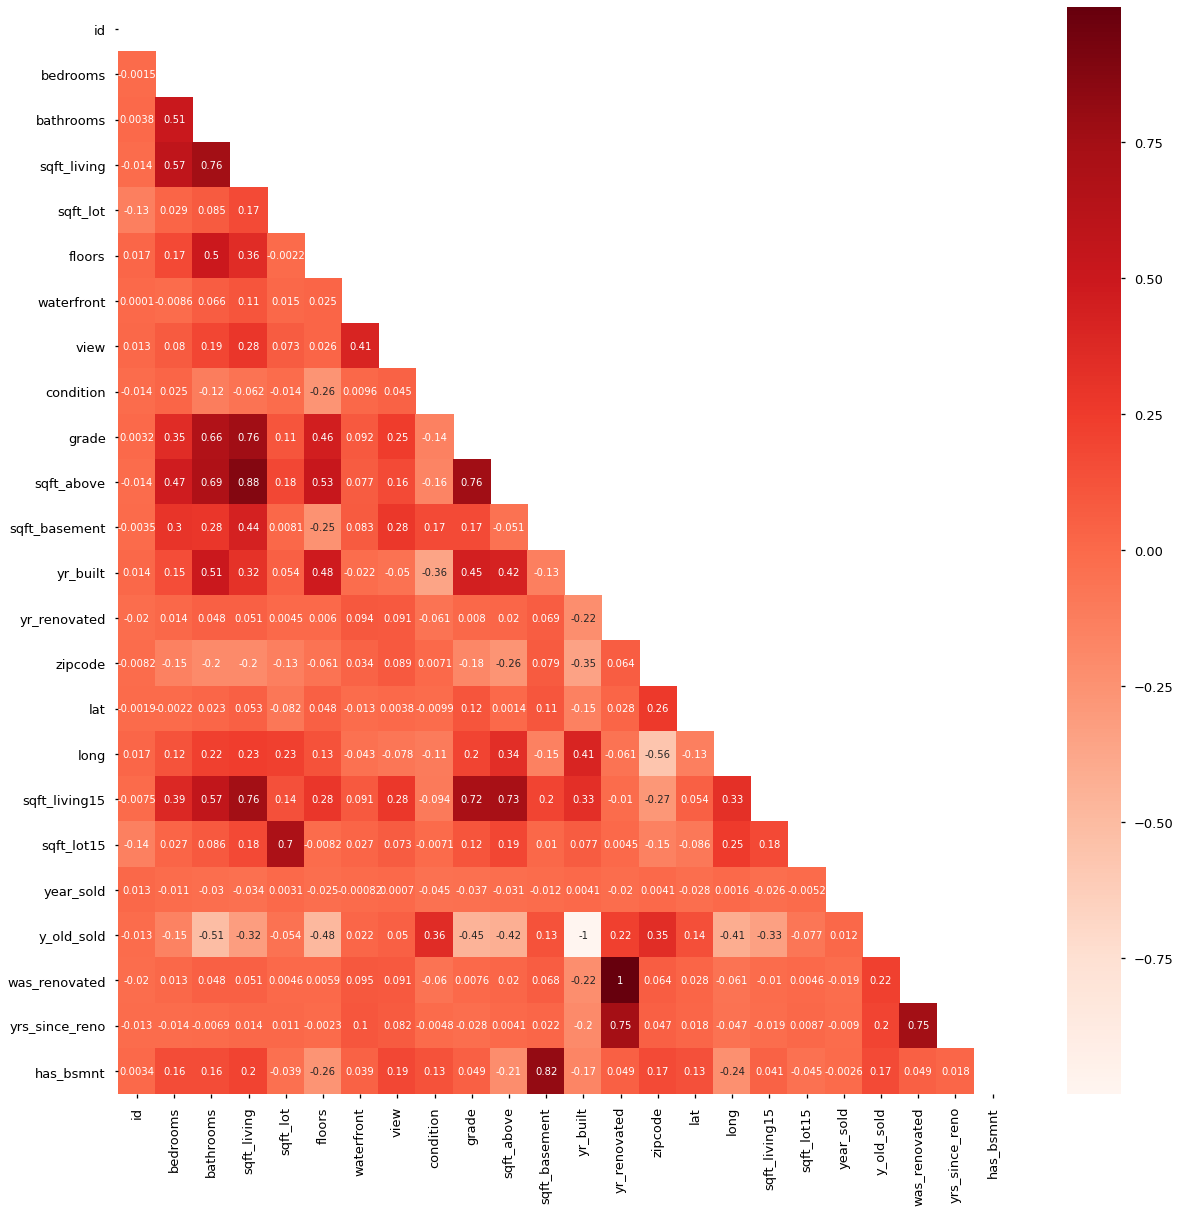

In [105]:
corr_val(df.drop('price',axis=1), figsize=(20,20));

In [106]:
# Correlation results ignoring (most) duplicate values
df_corr_results = df.corr().unstack().sort_values(ascending=False).drop_duplicates()

In [107]:
# Show strongest postive and negative correlations
display(df_corr_results[1:11], df_corr_results[-11:-1])

yr_renovated    was_renovated    1.00
sqft_living     sqft_above       0.88
has_bsmnt       sqft_basement    0.82
sqft_living     grade            0.76
grade           sqft_above       0.76
sqft_living     bathrooms        0.76
sqft_living15   sqft_living      0.76
was_renovated   yrs_since_reno   0.75
yrs_since_reno  yr_renovated     0.75
sqft_living15   sqft_above       0.73
dtype: float64

sqft_living  y_old_sold      -0.32
y_old_sold   sqft_living15   -0.33
zipcode      yr_built        -0.35
condition    yr_built        -0.36
long         y_old_sold      -0.41
sqft_above   y_old_sold      -0.42
y_old_sold   grade           -0.45
floors       y_old_sold      -0.48
y_old_sold   bathrooms       -0.51
zipcode      long            -0.56
dtype: float64

In [108]:
# Dropping columns to address multicollinearity (over .8)

df.drop(['yr_renovated','sqft_basement','sqft_above'], axis=1, inplace=True)

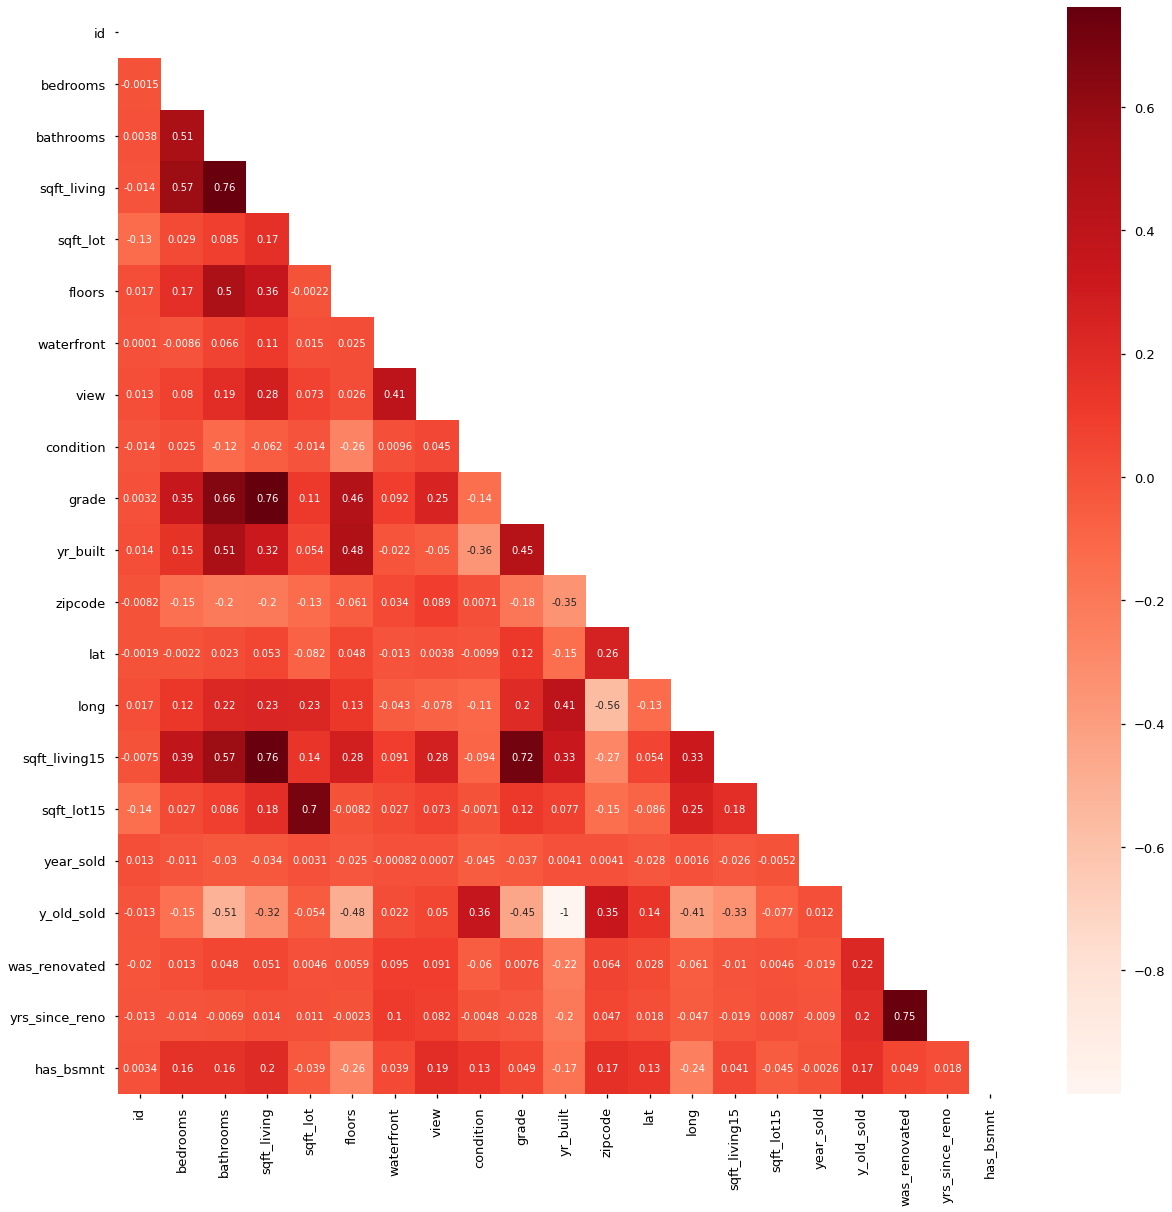

In [109]:
# Rerunning model

corr_val(df.drop('price',axis=1), figsize=(20,20));

In [110]:
# Correlation results ignoring (most) duplicate values
df_corr_results = df.corr().unstack().sort_values(ascending=False).drop_duplicates()

# Show strongest postive and negative correlations
display(df_corr_results[1:11], df_corr_results[-11:-1])

grade           sqft_living     0.76
sqft_living     bathrooms       0.76
                sqft_living15   0.76
yrs_since_reno  was_renovated   0.75
sqft_living15   grade           0.72
sqft_living     price           0.70
sqft_lot        sqft_lot15      0.70
price           grade           0.67
grade           bathrooms       0.66
price           sqft_living15   0.59
dtype: float64

zipcode      sqft_living15   -0.27
sqft_living  y_old_sold      -0.32
y_old_sold   sqft_living15   -0.33
yr_built     zipcode         -0.35
condition    yr_built        -0.36
long         y_old_sold      -0.41
grade        y_old_sold      -0.45
y_old_sold   floors          -0.48
             bathrooms       -0.51
long         zipcode         -0.56
dtype: float64

### Interpretation of Correlations

***
**Top 10 Positive Relationships**
>* Nothing too surprising as most of the matches are intuitively related.
>  * E.g. "yr_renovated" and "was_renovated" have a nearly-perfect positive correlation as "was_renovated" is determined by "yr_renovated" in our feature engineering.
>
>
>* Two interesting relationships would be:
>  * The living space (ft^2) and grade
>    * Indicates that a larger house has a higher grade
> * The living space (ft^2) of the 15 nearest houses sold
>   * Indicates a larger area above ground (ft^2)
>    * Perhaps larger houses are more likely to be nearby each other?
***
**Top 10 Negative Relationships**
>* Older houses may have fewer bathrooms
>* Older houses may have fewer floors
>* Older houses have a lower grade
***

# **Statistical Testing**

## One-Way ANOVA

### *Testing `'condition'`*

* H0: The feature "condition" does not have an effect on price.

* Ha: The feature "condition" does  have an effect on price.


In [111]:
## Defining variables for the prices of each value of conditions

condition_1 = df.loc[df['condition'] == 1, 'price']
condition_2 = df.loc[df['condition'] == 2, 'price']
condition_3 = df.loc[df['condition'] == 3, 'price']
condition_4 = df.loc[df['condition'] == 4, 'price']
condition_5 = df.loc[df['condition'] == 5, 'price']

In [112]:
## Running ANOVA test to determine significance

# Define alpha
alpha = .05

# Run test
result = stats.f_oneway(condition_1, condition_2, condition_3, condition_4, condition_5)
f_stat, p_value = result

# Evaluate if significant or not
if p_value < .05:
    print(f'The condition of a home is statistically significant with a p-value of {p_value}.')
    
else:
     print(f'The condition of a home is not statistically significant with a p-value of {p_value}.')

The condition of a home is statistically significant with a p-value of 6.813536869427384e-24.


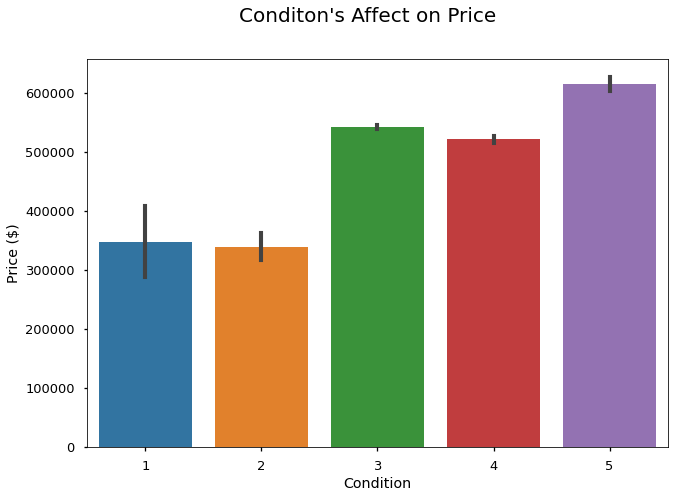

In [113]:
# Show visual of conclusion

sns.barplot(data=df, x= 'condition', y = 'price', ci=68)
plt.suptitle("Conditon's Affect on Price", size = (20))
plt.xlabel('Condition')
plt.ylabel('Price ($)');

#### Interpretation

> The t-test shows that the condition of a house is statistically significant due to the p-value below our alpha of .05.
>
> This means that the quality of a house will have a statistically significant impact on the sell price.

## Two-Sample T-Tests

### *Testing  `'waterfront'`*

* H0: The feature "waterfront" does not have an effect on price.

* Ha: The feature "waterfront" does  have an effect on price.


* Alpha = .05

In [114]:
# Set variables to represent whether or not a property is listed as 'waterfront.'

wf_yes = df.loc[df['waterfront'] == 1, 'price']
wf_no = df.loc[df['waterfront'] == 0, 'price']

In [115]:
ttest_review(wf_yes, wf_no, feature_name = 'Waterfront')

The feature "Waterfront" is statistically significant with a p-value of 2.465038317654299e-299.


2.465038317654299e-299

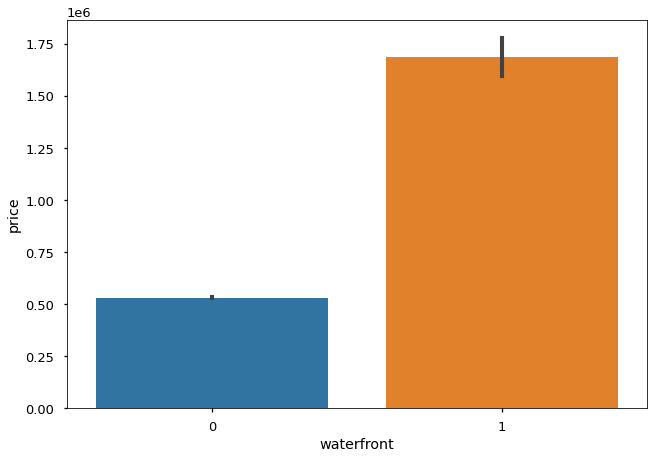

In [116]:
# Show visual of conclusion

sns.barplot(data=df, x= 'waterfront', y = 'price', ci=68);

#### Interpretation

> The t-test shows that waterfront is statistically significant due to the p-value below our alpha of .05.
>
> This means that having a house on the waterfront will have a significant impact on the sell price.

### *Testing `"was_renovated"`*

**Hypotheses**

---
>**H0:** There is not a statistically significant difference in price in homes with a basement than those without.
>
>**HA:** There is a statistically significant difference in price in homes with a basement than those without.
---

In [117]:
reno_y = df.loc[df['was_renovated'] == 1, 'price']
reno_n = df.loc[df['was_renovated'] == 0, 'price']


In [118]:
ttest_review(reno_y, reno_n, "was_renovated")

The feature "was_renovated" is statistically significant with a p-value of 4.007705820364685e-54.


4.007705820364685e-54

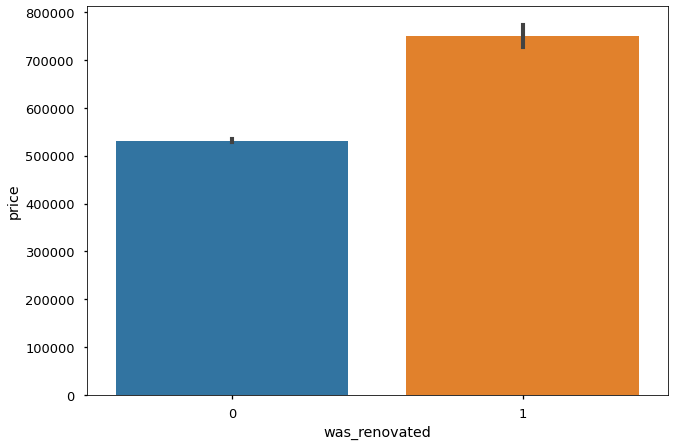

In [119]:
# Show visual of conclusion

sns.barplot(data=df, x= 'was_renovated', y = 'price', ci=68);

#### Interpretation

> The t-test shows that having a basement is statistically significant due to the p-value below our alpha of .05.
>
> This means that having a house with a basement will have a significant impact on the sell price.

# **Modeling**

## Baseline Model

In [120]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,y_old_sold,was_renovated,yrs_since_reno,has_bsmnt
count,"17,290.00","17,290.00","17,290.00","17,290.00","17,290.00","17,290.00","17,290.00","17,290.00","17,290.00","17,290.00","17,290.00","17,290.00","17,290.00","17,290.00","17,290.00","17,290.00","17,290.00","17,290.00","17,290.00","17,290.00","17,290.00","17,290.00"
mean,"4,565,501,756.44","540,739.55",3.37,2.11,"2,081.46","15,243.40",1.49,0.01,0.24,3.41,7.65,"1,970.79","98,078.19",47.56,-122.21,"1,987.99","12,873.48","2,014.32",43.53,0.04,0.77,0.39
std,"2,874,655,595.36","373,318.98",0.94,0.77,920.02,"42,304.62",0.54,0.09,0.78,0.65,1.17,29.34,53.61,0.14,0.14,684.80,"27,227.44",0.47,29.35,0.20,4.89,0.49
min,"1,000,102.00","75,000.00",0.00,0.00,290.00,572.00,1.00,0.00,0.00,1.00,1.00,"1,900.00","98,001.00",47.16,-122.52,399.00,659.00,"2,014.00",-1.00,0.00,-1.00,0.00
25%,"2,114,700,558.75","321,000.00",3.00,1.50,"1,430.00","5,081.25",1.00,0.00,0.00,3.00,7.00,"1,951.00","98,033.00",47.47,-122.33,"1,490.00","5,111.25","2,014.00",18.00,0.00,0.00,0.00
50%,"3,903,650,042.50","450,000.00",3.00,2.25,"1,920.00","7,642.00",1.50,0.00,0.00,3.00,7.00,"1,974.00","98,065.00",47.57,-122.23,"1,840.00","7,622.50","2,014.00",40.00,0.00,0.00,0.00
75%,"7,301,150,051.50","645,000.00",4.00,2.50,"2,550.00","10,725.75",2.00,0.00,0.00,4.00,8.00,"1,996.00","98,118.00",47.68,-122.13,"2,360.00","10,101.75","2,015.00",63.00,0.00,0.00,1.00
max,"9,900,000,190.00","7,700,000.00",33.00,8.00,"13,540.00","1,651,359.00",3.50,1.00,4.00,5.00,13.00,"2,015.00","98,199.00",47.78,-121.31,"6,210.00","858,132.00","2,015.00",115.00,1.00,80.00,1.00


price~+y_old_sold+yrs_since_reno+bedrooms+bathrooms+condition+grade+floors+C(was_renovated)+C(has_bsmnt)+C(waterfront)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     2576.
Date:                Thu, 03 Jun 2021   Prob (F-statistic):               0.00
Time:                        19:31:13   Log-Likelihood:            -2.3848e+05
No. Observations:               17290   AIC:                         4.770e+05
Df Residuals:                   17279   BIC:                         4.771e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -1.531e+06   1.81e+04    -84.504      0.000   -1.57e+06    -1.5e+06
C(was_renovated)[T.1]  5.842e+04   1.41e+04      4.130      0.000    3.07e+04    8.62e+04
C(has_bsmnt)[T.1]      3.158e+04   4156.712      7.597      0.000    2.34e+04    3.97e+04
C(waterfront)[T.1]     8.042e+05   2.05e+04     39.232      0.000    7.64e+05    8.44e+05
y_old_sold             4325.6941     85.480     50.605      0.000    4158.144    4493.244
yrs_since_reno        -2511.5735    564.503     -4.449      0.000   -3618.057   -1405.090
bedrooms              -2081.5430   2266.058     -0.919      0.358   -6523.247    2360.161
bathrooms               1.25e+05   3930.644     31.793      0.000    1.17e+05    1.33e+05
condition              2.008e+04   3045.263      6.594      0.000    1.41e+04     2.6e+04
grade                   1.98e+05   2117.430     93.491      0.000    1.94e+05    2.02e+05
floors                 1.586e+04   4400.252      3.604      0.000    7232.686    2.45e+04
==============================================================================
Omnibus:                    15571.873   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1844101.619
Skew:                           3.873   Prob(JB):                         0.00
Kurtosis:                      52.998   Cond. No.                         610.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

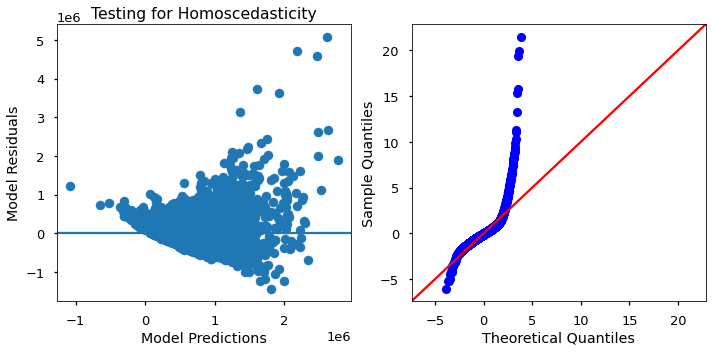

In [121]:
categorical_features = ['was_renovated','has_bsmnt', 'waterfront']

continuous_features = ['y_old_sold','yrs_since_reno', 'bedrooms', 'bathrooms',
                       'condition','grade', 'floors']

create_model(df,continuous_features,categorical_features,model_name='model1');

Interpretation:

* R^2: ~.6, less than target of .75

* Residual plots show heteroscedasticity

* Q-Q Plot shows non-normal residuals

* Changes: remove outliers and retest

## Model - W/O Outliers

### ✨ Cleaning 'Price' Data

In [122]:
## Remove outliers from price 
idx_outs = find_outliers_z(df['price'])
df_clean = df[~idx_outs].copy()
df_clean

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,y_old_sold,was_renovated,yrs_since_reno,has_bsmnt
0,2591820310,20141006T000000,"365,000.00",4,2.25,2070,8893,2.00,0,0,4,8,1986,98058,47.44,-122.16,2390,7700,2014,28,0,0.00,0
1,7974200820,20140821T000000,"865,000.00",5,3.00,2900,6730,1.00,0,0,5,8,1977,98115,47.68,-122.28,2370,6283,2014,37,0,0.00,1
2,7701450110,20140815T000000,"1,038,000.00",4,2.50,3770,10893,2.00,0,2,3,11,1997,98006,47.56,-122.13,3710,9685,2014,17,0,0.00,0
3,9522300010,20150331T000000,"1,490,000.00",3,3.50,4560,14608,2.00,0,2,3,12,1990,98034,47.70,-122.23,4050,14226,2015,25,0,0.00,0
4,9510861140,20140714T000000,"711,000.00",3,2.50,2550,5376,2.00,0,0,3,9,2004,98052,47.66,-122.08,2250,4050,2014,10,0,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,627300195,20150303T000000,"750,000.00",5,2.50,3240,9960,1.00,0,1,3,8,1958,98008,47.59,-122.11,2730,10400,2015,57,0,0.00,1
17286,8819900270,20140520T000000,"440,000.00",2,1.75,1300,4000,2.00,0,0,3,7,1948,98105,47.67,-122.29,1350,4013,2014,66,0,0.00,0
17287,3816300095,20140514T000000,"310,000.00",3,1.00,1050,9876,1.00,0,0,3,7,1953,98028,47.76,-122.26,1760,9403,2014,61,0,0.00,0
17288,122069107,20141204T000000,"427,500.00",3,1.50,1900,43186,1.50,0,0,4,7,1971,98038,47.42,-121.99,2080,108028,2014,43,0,0.00,1


In [123]:
## Remove outliers from bedrooms
idx_outs = find_outliers_z(df_clean['bedrooms'])
df_clean = df_clean[~idx_outs].copy()

df_clean

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,y_old_sold,was_renovated,yrs_since_reno,has_bsmnt
0,2591820310,20141006T000000,"365,000.00",4,2.25,2070,8893,2.00,0,0,4,8,1986,98058,47.44,-122.16,2390,7700,2014,28,0,0.00,0
1,7974200820,20140821T000000,"865,000.00",5,3.00,2900,6730,1.00,0,0,5,8,1977,98115,47.68,-122.28,2370,6283,2014,37,0,0.00,1
2,7701450110,20140815T000000,"1,038,000.00",4,2.50,3770,10893,2.00,0,2,3,11,1997,98006,47.56,-122.13,3710,9685,2014,17,0,0.00,0
3,9522300010,20150331T000000,"1,490,000.00",3,3.50,4560,14608,2.00,0,2,3,12,1990,98034,47.70,-122.23,4050,14226,2015,25,0,0.00,0
4,9510861140,20140714T000000,"711,000.00",3,2.50,2550,5376,2.00,0,0,3,9,2004,98052,47.66,-122.08,2250,4050,2014,10,0,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,627300195,20150303T000000,"750,000.00",5,2.50,3240,9960,1.00,0,1,3,8,1958,98008,47.59,-122.11,2730,10400,2015,57,0,0.00,1
17286,8819900270,20140520T000000,"440,000.00",2,1.75,1300,4000,2.00,0,0,3,7,1948,98105,47.67,-122.29,1350,4013,2014,66,0,0.00,0
17287,3816300095,20140514T000000,"310,000.00",3,1.00,1050,9876,1.00,0,0,3,7,1953,98028,47.76,-122.26,1760,9403,2014,61,0,0.00,0
17288,122069107,20141204T000000,"427,500.00",3,1.50,1900,43186,1.50,0,0,4,7,1971,98038,47.42,-121.99,2080,108028,2014,43,0,0.00,1


In [124]:
df_clean.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,y_old_sold,was_renovated,yrs_since_reno,has_bsmnt
count,"16,923.00","16,923.00","16,923.00","16,923.00","16,923.00","16,923.00","16,923.00","16,923.00","16,923.00","16,923.00","16,923.00","16,923.00","16,923.00","16,923.00","16,923.00","16,923.00","16,923.00","16,923.00","16,923.00","16,923.00","16,923.00","16,923.00"
mean,"4,580,302,379.76","506,846.03",3.35,2.08,"2,030.81","15,027.35",1.48,0.00,0.21,3.41,7.60,"1,970.75","98,078.44",47.56,-122.21,"1,961.79","12,762.48","2,014.32",43.57,0.04,0.75,0.39
std,"2,875,948,278.15","259,415.42",0.87,0.73,831.19,"41,723.12",0.54,0.07,0.72,0.65,1.11,29.24,53.53,0.14,0.14,654.64,"27,137.88",0.47,29.24,0.20,4.86,0.49
min,"1,000,102.00","75,000.00",1.00,0.00,370.00,572.00,1.00,0.00,0.00,1.00,3.00,"1,900.00","98,001.00",47.16,-122.52,399.00,659.00,"2,014.00",-1.00,0.00,-1.00,0.00
25%,"2,123,049,158.50","320,000.00",3.00,1.50,"1,420.00","5,040.00",1.00,0.00,0.00,3.00,7.00,"1,951.00","98,033.00",47.47,-122.33,"1,480.00","5,100.00","2,014.00",18.00,0.00,0.00,0.00
50%,"3,904,940,140.00","446,450.00",3.00,2.25,"1,900.00","7,587.00",1.00,0.00,0.00,3.00,7.00,"1,974.00","98,065.00",47.57,-122.23,"1,830.00","7,597.00","2,014.00",40.00,0.00,0.00,0.00
75%,"7,309,100,170.00","629,000.00",4.00,2.50,"2,500.00","10,511.50",2.00,0.00,0.00,4.00,8.00,"1,996.00","98,118.00",47.68,-122.12,"2,330.00","10,004.50","2,015.00",63.00,0.00,0.00,1.00
max,"9,900,000,190.00","1,655,000.00",6.00,6.00,"7,350.00","1,651,359.00",3.50,1.00,4.00,5.00,12.00,"2,015.00","98,199.00",47.78,-121.31,"5,790.00","858,132.00","2,015.00",115.00,1.00,80.00,1.00


price~+y_old_sold+yrs_since_reno+bedrooms+bathrooms+condition+grade+floors+C(was_renovated)+C(has_bsmnt)+C(waterfront)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     2422.
Date:                Thu, 03 Jun 2021   Prob (F-statistic):               0.00
Time:                        19:31:14   Log-Likelihood:            -2.2746e+05
No. Observations:               16923   AIC:                         4.549e+05
Df Residuals:                   16912   BIC:                         4.550e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -1.162e+06   1.35e+04    -86.344      0.000   -1.19e+06   -1.14e+06
C(was_renovated)[T.1]   5.14e+04   1.02e+04      5.021      0.000    3.13e+04    7.15e+04
C(has_bsmnt)[T.1]      4.068e+04   2964.749     13.721      0.000    3.49e+04    4.65e+04
C(waterfront)[T.1]      3.24e+05   1.89e+04     17.130      0.000    2.87e+05    3.61e+05
y_old_sold             3284.2377     62.183     52.816      0.000    3162.353    3406.122
yrs_since_reno        -1913.9577    402.413     -4.756      0.000   -2702.729   -1125.187
bedrooms               5271.9827   1739.192      3.031      0.002    1862.984    8680.981
bathrooms              7.191e+04   2921.530     24.613      0.000    6.62e+04    7.76e+04
condition              2.121e+04   2167.706      9.783      0.000     1.7e+04    2.55e+04
grade                  1.593e+05   1562.805    101.927      0.000    1.56e+05    1.62e+05
floors                 3.852e+04   3166.597     12.164      0.000    3.23e+04    4.47e+04
==============================================================================
Omnibus:                     2820.763   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7575.714
Skew:                           0.908   Prob(JB):                         0.00
Kurtosis:                       5.728   Cond. No.                         784.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

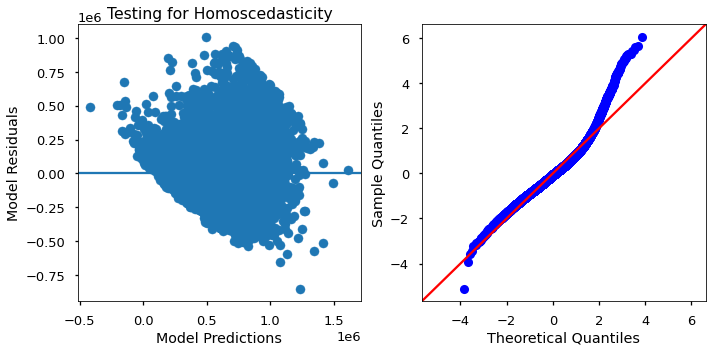

In [125]:
categorical_features = ['was_renovated','has_bsmnt', 'waterfront']

continuous_features = ['y_old_sold','yrs_since_reno', 'bedrooms', 'bathrooms',
                       'condition','grade', 'floors']

create_model(df_clean,cont=continuous_features,cat=categorical_features, model_name='model_clean1');

Interpretation:

* R^2: ~.59, less than target of .75

* Residual plots show somewhat homoscedasticity

* Q-Q Plot shows more normal residuals (vs. earlier plot)

* Changes: add zipcode 

In [126]:
## Unsure if duplicate model or not - holding until confirmed

# categorical_features = ['was_renovated','has_bsmnt', 'waterfront']

# continuous_features = ['y_old_sold','yrs_since_reno', 'bedrooms', 'bathrooms',
#                        'condition','grade', 'floors']

# create_model(df_clean,continuous_features,categorical_features,'clean_model1');

## Model - w/ Zip Codes

price~+y_old_sold+yrs_since_reno+bedrooms+bathrooms+condition+grade+floors+C(was_renovated)+C(has_bsmnt)+C(waterfront)+C(zipcode)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     723.0
Date:                Thu, 03 Jun 2021   Prob (F-statistic):               0.00
Time:                        19:42:28   Log-Likelihood:            -2.2246e+05
No. Observations:               16923   AIC:                         4.451e+05
Df Residuals:                   16843   BIC:                         4.457e+05
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -9.082e+05   1.29e+04    -70.617      0.000   -9.33e+05   -8.83e+05
C(was_renovated)[T.1]  5.205e+04   7669.920      6.786      0.000     3.7e+04    6.71e+04
C(has_bsmnt)[T.1]      4194.0254   2410.118      1.740      0.082    -530.059    8918.109
C(waterfront)[T.1]     4.146e+05   1.46e+04     28.492      0.000    3.86e+05    4.43e+05
C(zipcode)[T.98002]    7700.3206   1.24e+04      0.622      0.534   -1.66e+04     3.2e+04
C(zipcode)[T.98003]   -2.942e+04   1.11e+04     -2.651      0.008   -5.12e+04   -7666.780
C(zipcode)[T.98004]    6.095e+05   1.21e+04     50.472      0.000    5.86e+05    6.33e+05
C(zipcode)[T.98005]    2.997e+05    1.3e+04     22.968      0.000    2.74e+05    3.25e+05
C(zipcode)[T.98006]    2.806e+05   9970.638     28.143      0.000    2.61e+05       3e+05
C(zipcode)[T.98007]    2.074e+05   1.35e+04     15.307      0.000    1.81e+05    2.34e+05
C(zipcode)[T.98008]    2.307e+05   1.12e+04     20.617      0.000    2.09e+05    2.53e+05
C(zipcode)[T.98010]    1.156e+05   1.62e+04      7.135      0.000    8.39e+04    1.47e+05
C(zipcode)[T.98011]    1.349e+05   1.22e+04     11.047      0.000    1.11e+05    1.59e+05
C(zipcode)[T.98014]    1.667e+05   1.44e+04     11.542      0.000    1.38e+05    1.95e+05
C(zipcode)[T.98019]    1.188e+05   1.27e+04      9.368      0.000     9.4e+04    1.44e+05
C(zipcode)[T.98022]    3.376e+04   1.17e+04      2.892      0.004    1.09e+04    5.66e+04
C(zipcode)[T.98023]   -3.732e+04   9591.428     -3.891      0.000   -5.61e+04   -1.85e+04
C(zipcode)[T.98024]    2.266e+05   1.73e+04     13.095      0.000    1.93e+05    2.61e+05
C(zipcode)[T.98027]    1.868e+05   1.01e+04     18.439      0.000    1.67e+05    2.07e+05
C(zipcode)[T.98028]    1.311e+05   1.12e+04     11.735      0.000    1.09e+05    1.53e+05
C(zipcode)[T.98029]    1.883e+05   1.09e+04     17.344      0.000    1.67e+05     2.1e+05
C(zipcode)[T.98030]   -7414.8887   1.14e+04     -0.648      0.517   -2.98e+04     1.5e+04
C(zipcode)[T.98031]   -5749.4528   1.12e+04     -0.511      0.609   -2.78e+04    1.63e+04
C(zipcode)[T.98032]   -1.688e+04   1.43e+04     -1.181      0.238   -4.49e+04    1.11e+04
C(zipcode)[T.98033]    3.474e+05   9992.388     34.769      0.000    3.28e+05    3.67e+05
C(zipcode)[T.98034]    1.682e+05   9518.772     17.668      0.000     1.5e+05    1.87e+05
C(zipcode)[T.98038]     5.18e+04   9424.092      5.497      0.000    3.33e+04    7.03e+04
C(zipcode)[T.98039]    8.197e+05   3.19e+04     25.677      0.000    7.57e+05    8.82e+05
C(zipcode)[T.98040]    4.667e+05   1.17e+04     39.877      0.000    4.44e+05     4.9e+05
C(zipcode)[T.98042]    1.474e+04   9540.112      1.545      0.122   -3957.891    3.34e+04
C(zipcode)[T.98045]    1.216e+05   1.19e+04     10.209      0.000    9.83e+04    1.45e+05
C(zipcode)[T.98052]    

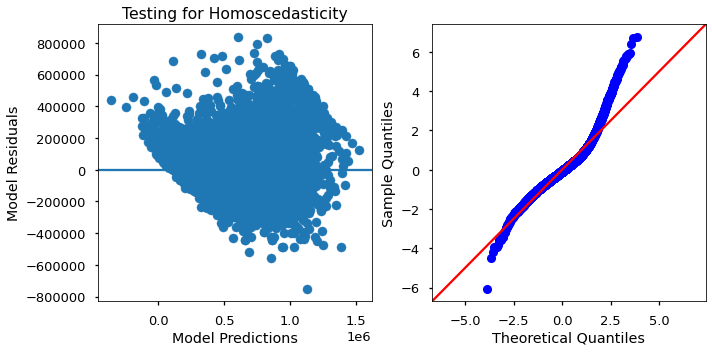

In [139]:
## Added zip codes as a categorical feature

categorical_features = ['was_renovated','has_bsmnt', 'waterfront', 'zipcode']

continuous_features = ['y_old_sold','yrs_since_reno', 'bedrooms', 'bathrooms',
                       'condition','grade', 'floors']

create_model(df_clean,cont=continuous_features,cat=categorical_features, model_name='model_clean2');

Interpretation:

* R^2: ~.77, greater than target of .75

* Residual plots show somewhat homoscedasticity

* Q-Q Plot shows more normal residuals (vs. earlier plot)

* Changes: remove features with p-values higher than .05

price~+y_old_sold+yrs_since_reno+bedrooms+bathrooms+condition+grade+C(was_renovated)+C(waterfront)+C(zipcode)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     741.2
Date:                Thu, 03 Jun 2021   Prob (F-statistic):               0.00
Time:                        19:42:52   Log-Likelihood:            -2.2246e+05
No. Observations:               16923   AIC:                         4.451e+05
Df Residuals:                   16845   BIC:                         4.457e+05
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -9.145e+05   1.26e+04    -72.433      0.000   -9.39e+05    -8.9e+05
C(was_renovated)[T.1]  5.184e+04   7671.429      6.757      0.000    3.68e+04    6.69e+04
C(waterfront)[T.1]     4.146e+05   1.45e+04     28.510      0.000    3.86e+05    4.43e+05
C(zipcode)[T.98002]    6498.2936   1.24e+04      0.525      0.599   -1.78e+04    3.08e+04
C(zipcode)[T.98003]    -2.86e+04   1.11e+04     -2.577      0.010   -5.03e+04   -6842.006
C(zipcode)[T.98004]    6.101e+05   1.21e+04     50.523      0.000    5.86e+05    6.34e+05
C(zipcode)[T.98005]    3.014e+05    1.3e+04     23.107      0.000    2.76e+05    3.27e+05
C(zipcode)[T.98006]    2.818e+05   9965.649     28.272      0.000    2.62e+05    3.01e+05
C(zipcode)[T.98007]    2.073e+05   1.36e+04     15.295      0.000    1.81e+05    2.34e+05
C(zipcode)[T.98008]     2.32e+05   1.12e+04     20.739      0.000     2.1e+05    2.54e+05
C(zipcode)[T.98010]    1.148e+05   1.62e+04      7.083      0.000     8.3e+04    1.47e+05
C(zipcode)[T.98011]     1.35e+05   1.22e+04     11.057      0.000    1.11e+05    1.59e+05
C(zipcode)[T.98014]    1.658e+05   1.44e+04     11.478      0.000    1.37e+05    1.94e+05
C(zipcode)[T.98019]    1.179e+05   1.27e+04      9.296      0.000    9.31e+04    1.43e+05
C(zipcode)[T.98022]    3.311e+04   1.17e+04      2.836      0.005    1.02e+04     5.6e+04
C(zipcode)[T.98023]   -3.635e+04   9589.388     -3.791      0.000   -5.51e+04   -1.76e+04
C(zipcode)[T.98024]    2.261e+05   1.73e+04     13.063      0.000    1.92e+05     2.6e+05
C(zipcode)[T.98027]     1.87e+05   1.01e+04     18.496      0.000    1.67e+05    2.07e+05
C(zipcode)[T.98028]    1.316e+05   1.12e+04     11.782      0.000     1.1e+05    1.54e+05
C(zipcode)[T.98029]    1.866e+05   1.08e+04     17.204      0.000    1.65e+05    2.08e+05
C(zipcode)[T.98030]   -7704.2765   1.14e+04     -0.673      0.501   -3.01e+04    1.47e+04
C(zipcode)[T.98031]   -5857.5752   1.12e+04     -0.521      0.602   -2.79e+04    1.62e+04
C(zipcode)[T.98032]   -1.643e+04   1.43e+04     -1.149      0.250   -4.44e+04    1.16e+04
C(zipcode)[T.98033]    3.475e+05   9994.606     34.769      0.000    3.28e+05    3.67e+05
C(zipcode)[T.98034]    1.693e+05   9515.521     17.787      0.000    1.51e+05    1.88e+05
C(zipcode)[T.98038]    5.042e+04   9417.311      5.353      0.000     3.2e+04    6.89e+04
C(zipcode)[T.98039]    8.205e+05   3.19e+04     25.699      0.000    7.58e+05    8.83e+05
C(zipcode)[T.98040]    4.675e+05   1.17e+04     39.945      0.000    4.45e+05     4.9e+05
C(zipcode)[T.98042]    1.417e+04   9540.489      1.486      0.137   -4526.835    3.29e+04
C(zipcode)[T.98045]    1.213e+05   1.19e+04     10.179      0.000    9.79e+04    1.45e+05
C(zipcode)[T.98052]    2.326e+05   9362.476     24.843      0.000    2.14e+05    2.51e+05
C(zipcode)[T.98053]    

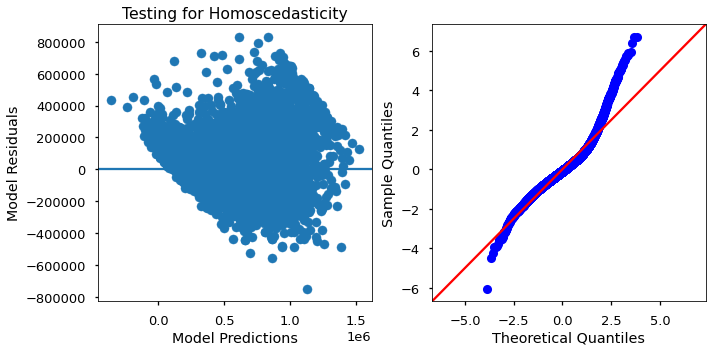

In [142]:
## Removed 'has_basement', 'floors' due to high p-values

categorical_features = ['was_renovated','waterfront', 'zipcode']

continuous_features = ['y_old_sold','yrs_since_reno', 'bedrooms', 'bathrooms',
                       'condition','grade']

model_clean1 = create_model(df_clean,cont=continuous_features,cat=categorical_features, model_name='model_clean3');

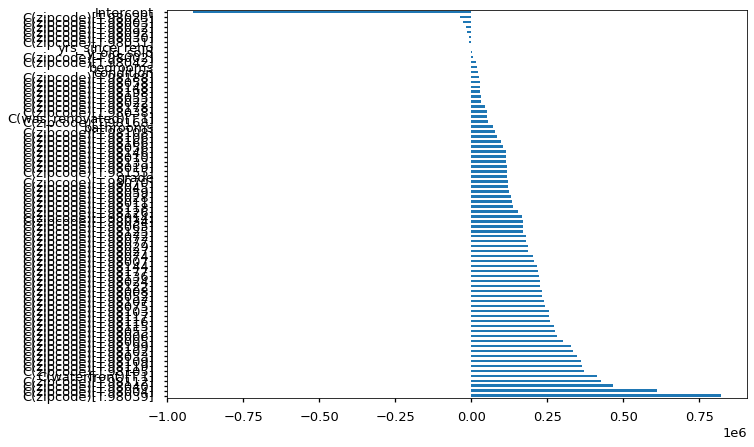

In [143]:
coeff_clean = model_clean1.params.sort_values(ascending=False)
coeff_clean.plot(kind='barh');

In [144]:
coeff_clean.sort_index()

C(was_renovated)[T.1]     51,837.91
C(waterfront)[T.1]       414,606.13
C(zipcode)[T.98002]        6,498.29
C(zipcode)[T.98003]      -28,595.15
C(zipcode)[T.98004]      610,089.19
C(zipcode)[T.98005]      301,351.40
C(zipcode)[T.98006]      281,751.91
C(zipcode)[T.98007]      207,288.13
C(zipcode)[T.98008]      232,019.60
C(zipcode)[T.98010]      114,796.29
C(zipcode)[T.98011]      135,016.93
C(zipcode)[T.98014]      165,804.03
C(zipcode)[T.98019]      117,918.13
C(zipcode)[T.98022]       33,105.46
C(zipcode)[T.98023]      -36,350.80
C(zipcode)[T.98024]      226,084.70
C(zipcode)[T.98027]      187,040.98
C(zipcode)[T.98028]      131,613.77
C(zipcode)[T.98029]      186,562.59
C(zipcode)[T.98030]       -7,704.28
C(zipcode)[T.98031]       -5,857.58
C(zipcode)[T.98032]      -16,427.66
C(zipcode)[T.98033]      347,498.80
C(zipcode)[T.98034]      169,253.53
C(zipcode)[T.98038]       50,415.05
C(zipcode)[T.98039]      820,544.52
C(zipcode)[T.98040]      467,462.73
C(zipcode)[T.98042]       14

### Recommendations

* Add bathroom
* Use high-quality materials in renovations
* Zip code will have large effect on price, but beyond homeowner's control
* Also consider adding bedrooms

In [ ]:
sns.barplot(data=df_clean, x='waterfront', y='price', ci=68);

In [ ]:
sns.regplot(data=df_clean, x="bathrooms", y='price')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price ($)')
plt.suptitle("Increasing Price with Bathrooms", size=20)

# plt.savefig('regplot_bath.png');

In [ ]:
sns.regplot(data=df_clean, x="bedrooms", y='price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price ($)')
plt.suptitle("Increasing Price with Bedrooms", size=20)

# plt.savefig('regplot_bed.png');

In [ ]:
sns.regplot(data=df_clean, x="grade", y='price')
plt.xlabel('Construction Grade')
plt.ylabel('Price ($)')
plt.suptitle("Increasing Price with Construction Grade", size=20)

# plt.savefig('regplot_grade.png');

In [ ]:
fg = sns.catplot(data=df_clean, x="zipcode", y='price', aspect=2.9, height=5)
fg.ax.set_xticklabels(fg.ax.get_xticklabels(), rotation=50, ha='right')
plt.xlabel('Zip Code')
plt.ylabel('Price ($)')
plt.suptitle("Pricing per Zip Code", size=20)

# plt.savefig('catplot_zipcode.png');

## Model (Zipcode as Cat)

In [ ]:
# # Creating a model that includes Zipcode as a category

# f = 'price~bedrooms+sqft_living+grade+waterfront+C(zipcode)'

# model_w_c_zip = smf.ols(formula=f, data=df_clean).fit()

# diagnose_model(model_w_c_zip)

In [ ]:
# identify_high_pv(model_w_c_zip)

In [ ]:
# plot_param_coef(model_w_c_zip, figsize=(10,20))

In [ ]:
# sns.regplot(data=df_clean,x='sqft_living',y='price')

***
>* **R2:** This model explains 78% of the data, which is a significant increase from the first.


>* **Coefficients:** According to this model, the "Zipcode 98039" feature indicates the strongest impact on determining price. Having a home in that zip code has the highest impact on price. Additionally, this indicates that zip code may be one of the stronger predictors for our modeling.


>* **P-Values:** 

>* **Homoscedasticity:** Our scatter plot of the predictions has a cone-shape, indicating the error term in our model is inconsistent.


>* **Normality of Residuals:** Our second scatter plot violates the assumption of the normality of the residuals.


>* **Overall:** the model violates the assumptions of Homoscedasticity and the Normality of Residuals. The model is not proper and could result in improper inferences.
***

# **Model Testing**

## ID Features, Target

In [145]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'year_sold', 'y_old_sold', 'was_renovated', 'yrs_since_reno',
       'has_bsmnt'],
      dtype='object')

In [146]:
features = ['waterfront', 'view', 'sqft_living']

df_features= df[features]
df_features.columns

Index(['waterfront', 'view', 'sqft_living'], dtype='object')

In [ ]:
target_variable = df['price']

## Create Train/Test Split

In [130]:
X_train, X_test, y_train, y_test = train_test_split(df_features, target_variable, random_state=5,test_size=.25)

NameError: name 'df_features' is not defined

In [131]:
## Verify the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Testing set - Features: ", X_test.shape, "Target: ",y_test.shape)

NameError: name 'X_train' is not defined

In [ ]:
# fit a model


#instantiate a linear regression object
lm = linear_model.LinearRegression()

#fit the linear regression to the training data
lm.fit(X_train, y_train)


display(lm.intercept_)
display(lm.coef_)

## Evaluate Performance

In [ ]:
#predict on the training data
y_train_pred = lm.predict(X_train)

In [ ]:
y_train_pred

In [ ]:
train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('MAE:', train_mae )
print('MSE:',  train_mse)
print('RMSE:' , train_rmse)

## Predicting Test Set

In [ ]:
## Determine predictions for test set
y_pred = lm.predict(X_test)

In [ ]:
y_pred[:10]

In [ ]:
## Print r-squared metric

print ("Score:", lm.score(X_test, y_test))

In [ ]:
test_mae = metrics.mean_absolute_error(y_test, y_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))


print('MAE:' + str(metrics.mean_absolute_error(y_test, y_pred)))
print('MSE:' + str(metrics.mean_squared_error(y_test, y_pred)))
print('RMSE:' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

## Comparing Performance: Training vs. Test

In [ ]:
diff = train_rmse - test_rmse

print('Training Model: $', int(train_rmse))
print('Testing Model: $', int(test_rmse))
print(f'The difference between the training data and test data is ${round(diff, 2)}.')

## Diagnose Model Performance

In [ ]:
#create a data array of our errors/residuals
residuals = (y_test - y_pred)
residuals

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(10,5))

axes[0].scatter(y_pred,residuals)
axes[0].axhline()
axes[0].set_xlabel('Model Predictions')
axes[0].set_ylabel('Model Residuals')
axes[0].set_title('Testing for Homoscedasticity')

sms.graphics.qqplot(data=residuals, fit=True, line = "45", ax=axes[1])

plt.tight_layout()

## Recursive Feature Elimination

In [ ]:
lr_rfe = LinearRegression()
select = RFE(lr_rfe, n_features_to_select=3)

In [ ]:
ss = StandardScaler()
ss.fit(X_train)

price_scaled = ss.transform(X_train)

In [ ]:
select.fit(X=price_scaled, y=df['price'])

In [ ]:
select.support_

In [ ]:
df.head()

In [ ]:
select.ranking_

### Alternate code for RFE

#### ✨ Cite Sources!!!

* May want to compare vs. Sean's code - which is most effective?

In [ ]:
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LogisticRegression
# rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=3, step=10, verbose=5)
# rfe_selector.fit(price_scaled, y=df['price'])
# rfe_support = rfe_selector.get_support()
# rfe_feature = X.loc[:,rfe_support].columns.tolist()
# print(str(len(rfe_feature)), 'selected features')

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000, n_features=25, n_informative=3,
                           n_redundant=2, n_repeated=0, n_classes=8,
                           n_clusters_per_class=1, random_state=0)

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy',
              min_features_to_select=min_features_to_select)
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv.grid_scores_) + min_features_to_select),
         rfecv.grid_scores_)
plt.show()

In [ ]:
rfecv.ranking_

In [ ]:
# np.absolute(rfecv.estimator_.coef_)

In [ ]:
df.head()